Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Case Study on Yield Curve Changes Using PCA

**Name:** József Soltész

**Email address associated with your DataCamp account:** [solteszjozsef@gmail.com](mailto:solteszjozsef@gmail.com)

**GitHub username:** solteszjozsef

**Project description**: This will be read by the students on the DataCamp platform **before** deciding to start the project. The description should be three paragraphs, written in Markdown.

- The level, the shape and the volatility of the yield curve of government bonds are in the scope of interest for many financial analysts, economist and risk managers. In this notebook we will explore the main types of yield curve changes via Principal Component Analysis (CPA), thus we will see how the different points fluctuate together or diverge drawing certain patterns.
- This project assumes background knowledge on data manipulation concepts and data visualization, focusing on the packages **tidyr** and **ggplot2**. It also builds on the experience on statistical methods, namely the **Principal Component Analysis (CPA)**. 
- The historical yield curve data are published by the US Federal Reserve Data Releases and imported from Quandl, using this site: [https://www.quandl.com/data/FED/SVENY](https://www.quandl.com/data/FED/SVENY)

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Introduction to the yield curve

In this notebook we will analyze the nature of yield curve changes. In finance the yield of a financial debt instrument shows the potential return on it, for example, if a bond trades at 10%, then an investors expects that their money will be 10% more in a year. If we take several similar debt instruments with different maturities (like 2 months, 3 years, 10 years), we get the yield curve. 

Financial analysts, economists and risk managers are also interested in the level, shape and volatility of the yield curve for different reasons. The financial analysts make investment decisions based on the expected returns and risks. Economists are very much interested in the shape of the yield as it might indicate changes in the business cycles. Risk managers mostly measure the volatility of yields and use this as an input to estimate portfolio risks.

![](img/640px-U.S._Treasury_Yield_Curves_-_v1.png)

Link to the picture: [https://commons.wikimedia.org/wiki/File:U.S._Treasury_Yield_Curves_-_v1.png](https://commons.wikimedia.org/wiki/File:U.S._Treasury_Yield_Curves_-_v1.png)

In this notebook we will explore the structure of daily yield curve changes using Principal Component Analysis (PCA) technique. It will shine a light upon how the yield curve typically behave. The dataset we will use is [FED yield curve imported from Quandl](https://www.quandl.com/data/FED/SVENY). These yield curves are an off-the-run Treasury yield curve based on a large set of outstanding Treasury notes and bonds, and are based on a continuous compounding convention. Values are daily estimates of the yield curve from 1961 for the entire maturity range spanned by outstanding Treasury securities.


In [1]:
# 1. Load the tidyverse package using the library function.
library(tidyverse)

# 2. Import the data from “FED-SVENY.csv” into a variable named yield_curve.
yield_curve <- read_csv("datasets/FED-SVENY.csv")

# 3. Then take a look at the first and the final rows.
head(yield_curve)
tail(yield_curve)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.1.0     <U+221A> purrr   0.2.5
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.8
<U+221A> tidyr   0.8.2     <U+221A> stringr 1.3.1
<U+221A> readr   1.3.1     <U+221A> forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'tibble' was built under R version 3.4.4"Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'readr' was built under R version 3.4.4"Warning message:
"package 'purrr' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"Warning message:
"package 'stringr' was built under R version 3.4.4"Warning message:
"package 'forcats' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specifi

Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
2018-11-23,2.6955,2.7944,2.8171,2.8419,2.8750,2.9133,2.9532,2.9923,3.0291,...,3.2720,3.2817,3.2906,3.2988,3.3064,3.3133,3.3198,3.3258,3.3314,3.3366
2018-11-21,2.7041,2.8048,2.8325,2.8590,2.8922,2.9299,2.9689,3.0070,3.0430,...,3.2814,3.2910,3.2998,3.3079,3.3154,3.3223,3.3286,3.3346,3.3401,3.3452
2018-11-20,2.6814,2.7900,2.8305,2.8551,2.8816,2.9132,2.9488,2.9860,3.0227,...,3.2811,3.2915,3.3011,3.3098,3.3178,3.3252,3.3321,3.3385,3.3444,3.3500
2018-11-19,2.6736,2.7728,2.8181,2.8480,2.8772,2.9096,2.9447,2.9811,3.0173,...,3.2861,3.2974,3.3077,3.3172,3.3259,3.3340,3.3415,3.3484,3.3549,3.3609
2018-11-16,2.6854,2.8044,2.8469,2.8718,2.8986,2.9309,2.9673,3.0051,3.0423,...,3.2990,3.3092,3.3185,3.3271,3.3349,3.3422,3.3489,3.3552,3.3610,3.3664
2018-11-15,2.7156,2.8451,2.8799,2.9056,2.9357,2.9702,3.0066,3.0430,3.0781,...,3.3268,3.3372,3.3468,3.3557,3.3638,3.3714,3.3784,3.3849,3.3909,3.3966


Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
1961-06-21,2.9993,3.4236,3.6132,3.7107,3.7694,3.8085,3.8364,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-20,2.9833,3.4101,3.5986,3.6952,3.7533,3.7921,3.8198,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-19,2.9949,3.4386,3.6252,3.7199,3.7768,3.8147,3.8418,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-16,3.0012,3.4142,3.5994,3.6953,3.7531,3.7917,3.8192,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-15,2.9941,3.4137,3.5981,3.6930,3.7501,3.7882,3.8154,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961-06-14,2.9825,3.3771,3.5530,3.6439,3.6987,3.7351,3.7612,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## 2. Yield curve over 6 decades

This data set contains the yield curves by tenors ranging from 1 year to 30 years. In finance the tenor refers to the time to maturity of a bond. The reference dates are from 1961 to the recent years, so it spans a long period of time. During these decades the level of yield was also around zero and well above 10% and its shape also changed from increasing to decreasing and bumpy.

Unfortunately before 25/11/1985 it does not have all the tenors we need for PCA so we have to filter them out.

Now let's view the yield curve at the end of decades and filter the dates after 25/11/1985.

Loading required package: reshape2

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"Warning message:
"Removed 61 rows containing missing values (geom_path)."Warning message:
"Removed 61 rows containing missing values (geom_point)."

min(Date),max(Date)
1985-11-25,2018-11-23


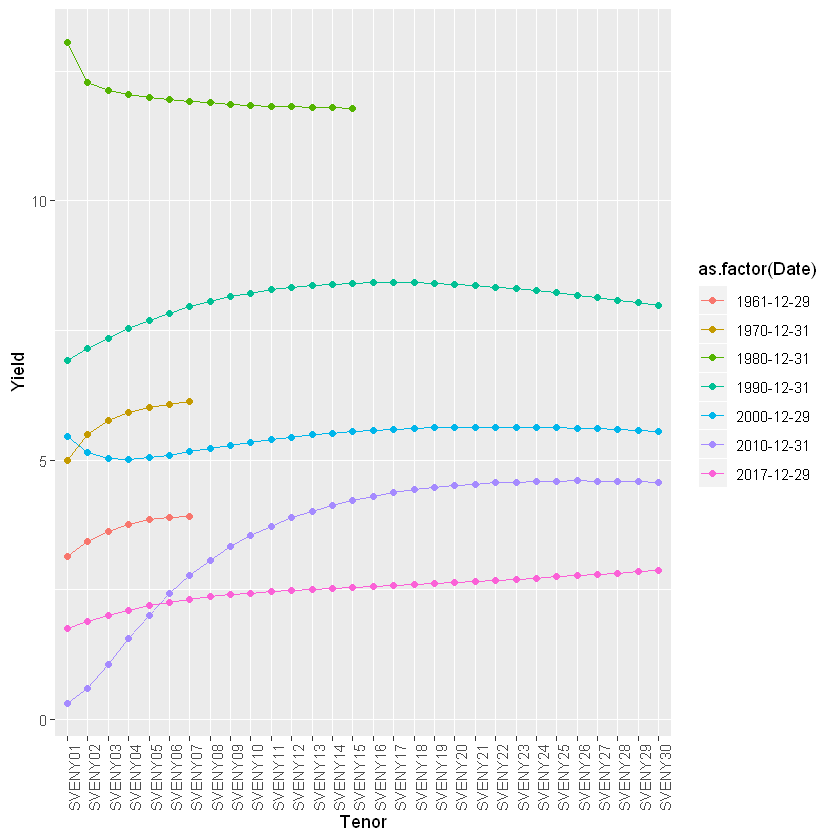

In [2]:
# 1. Filter for the following dates and plot them via ggplot2. The dates are: "1961-12-29", "1970-12-31", "1980-12-31", "1990-12-31", "2000-12-29", "2010-12-31", "2017-12-29"
# Melt the tenor columns into rows using the melt command from reshape2 package. The variable name should be 'Tenor', the value name should be 'Yield'.
require(reshape2)
yc_some_dates <- yield_curve %>% 
    filter(Date %in% as.Date(c("1961-12-29", "1970-12-31", "1980-12-31", "1990-12-31", "2000-12-29", "2010-12-31", "2017-12-29"))) %>% 
    melt(id.vars = 'Date', variable.name = 'Tenor', value.name = 'Yield')
ggplot(yc_some_dates, aes(x = Tenor, y = Yield, col = as.factor(Date), group = as.factor(Date))) + 
    geom_line() + geom_point() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

# 2. Filter for the rows with date after 25/11/1985.
yield_curve_2 <- yield_curve %>% filter(Date >= "1985-11-25")

# 3. Get the first and the last dates in order to check the filtering
yield_curve_2 %>% summarize(min(Date), max(Date))




## 3. Generating daily changes

A financial analyst is interested not only in the level of the yield curve but the changes in it. Both are interesting things to analyze, from the financial viewpoint the main difference between them is the following:

* The level of yields determine the value of the bonds thus the whole portfolio. It is also an economic indicator and affects investment strategy.
* The yield changes are the factors that lead to the variation of portfolio market value. The upward changes in the yield causes a decline in bond value, and the changes in the steepness might affect the effectiveness of risk management strategies.

In [3]:
# 1. Calculate the daily yield changes. Take the following steps:
# a. Arrange the dataset by Date in ascending order.
# b. Use the mutate_if to calculate the differences for all tenors. The first argument is a condition for the columns to be mutated. The second argument is formula for the new variable. use the dot (.) for specifing the variable in the formula.
# c. Use the filter_all in order to filter out the observations with NA value. It will be the first row, because there is no lag value for this row. 
yc_change <- 
  yield_curve %>% 
  arrange(Date) %>% 
  mutate_if(is.numeric,funs(.-lag(.))) %>% 
  filter_all(all_vars(!is.na(.)))

# 2. View the first few rows.
head(yc_change)

Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
1985-11-26,-0.0024,-0.0051,-0.0049,-0.0032,-0.0009,0.0013,0.0032,0.0044,0.0050,...,-0.0324,-0.0369,-0.0414,-0.0458,-0.0502,-0.0544,-0.0585,-0.0625,-0.0664,-0.0701
1985-11-27,-0.0102,-0.0053,-0.0081,-0.0145,-0.0224,-0.0301,-0.0370,-0.0427,-0.0470,...,-0.0340,-0.0313,-0.0286,-0.0259,-0.0233,-0.0209,-0.0185,-0.0163,-0.0141,-0.0121
1985-11-29,-0.0511,-0.0374,-0.0348,-0.0379,-0.0429,-0.0481,-0.0525,-0.0555,-0.0573,...,-0.0359,-0.0342,-0.0327,-0.0315,-0.0303,-0.0294,-0.0286,-0.0279,-0.0273,-0.0268
1985-12-02,0.0262,0.0309,0.0368,0.0442,0.0526,0.0615,0.0705,0.0790,0.0868,...,0.1058,0.1034,0.1008,0.0981,0.0952,0.0923,0.0894,0.0865,0.0836,0.0807
1985-12-03,0.0351,0.0222,0.0181,0.0182,0.0196,0.0208,0.0208,0.0194,0.0165,...,-0.0729,-0.0804,-0.0876,-0.0945,-0.1010,-0.1072,-0.1131,-0.1187,-0.1241,-0.1291
1985-12-04,-0.0034,-0.0184,-0.0304,-0.0398,-0.0465,-0.0510,-0.0537,-0.0547,-0.0546,...,-0.0239,-0.0214,-0.0189,-0.0167,-0.0146,-0.0125,-0.0106,-0.0088,-0.0070,-0.0054


*Stop here! Only the three first tasks. :)*

## 4. To be continued...

Planned tasks:
4. Standard deviations of tenors
5. Correlation structure
6. Estimating principal components
7. Prepare for plotting
8. Plotting the components of yield changes
9. Conclusion